In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
print("Train shape : ", df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


In [3]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


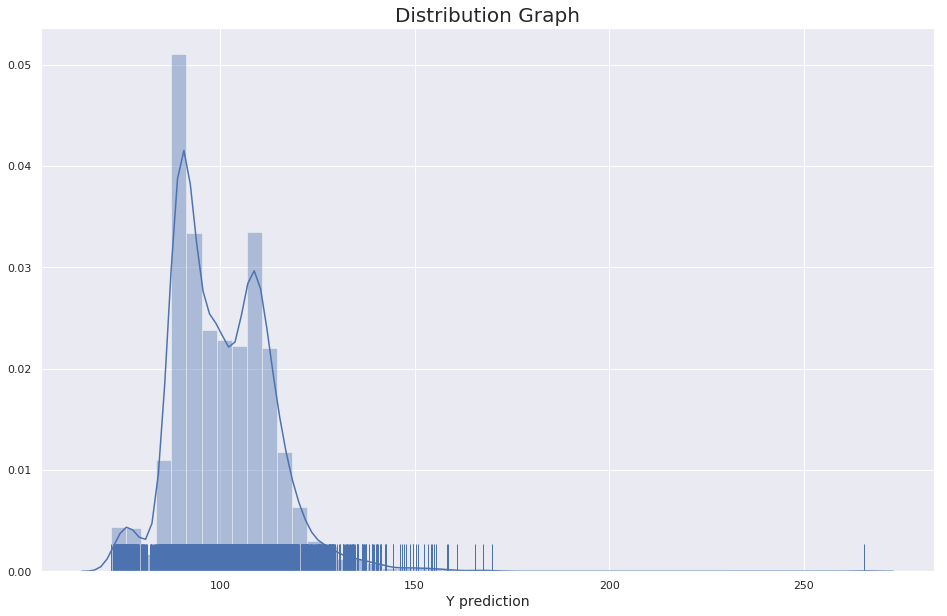

In [4]:
import seaborn as sns; sns.set(color_codes=True)

ulimit = df['y'].ix[df['y']>= 180]

plt.figure(figsize=(16,10))
sns.distplot(df.y.values, kde=True, rug=True)
plt.xlabel('Y prediction', fontsize=14)
plt.title('Distribution Graph', fontsize=20)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


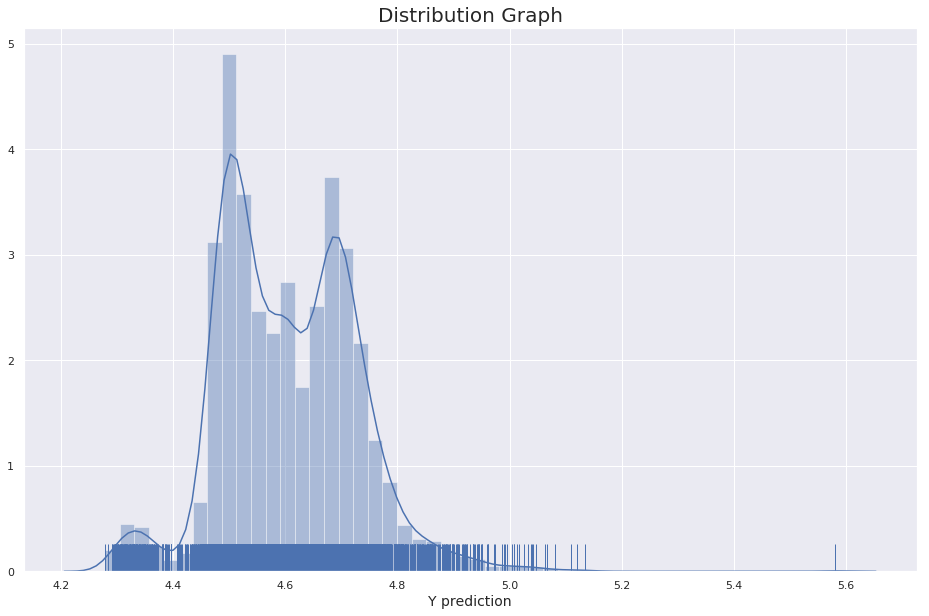

In [5]:
plt.figure(figsize=(16,10))
sns.distplot(np.log(df.y.values), kde=True, rug=True)
plt.xlabel('Y prediction', fontsize=14)
plt.title('Distribution Graph', fontsize=20)
plt.show()

In [6]:
type(df['X0'])

pandas.core.series.Series

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

lb = preprocessing.LabelBinarizer()
lb.fit_transform(["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"])

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [8]:
enc = OneHotEncoder(handle_unknown='ignore')
for col in df.columns:
    if col is ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        X = str(np.sort(df[col].unique()).tolist())
        enc.fit(X)
        enc.transform(df[col])

In [9]:
#Inspi
dict_ = {}
for col_1 in df.columns:
    if col_1 not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        valeur_unique = str(np.sort(df[col_1].unique()).tolist())
        
        tlist = dict_.get(valeur_unique, [])
        tlist.append(col_1)
        dict_[valeur_unique] = tlist[:]
        
for valeur_unique, colonnes in dict_.items():
    print("Les valeurs unique:", valeur_unique)
    print(colonnes)

Les valeurs unique: [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147', 'X

Text(0.5, 1.0, 'Distribution X2 with Y')

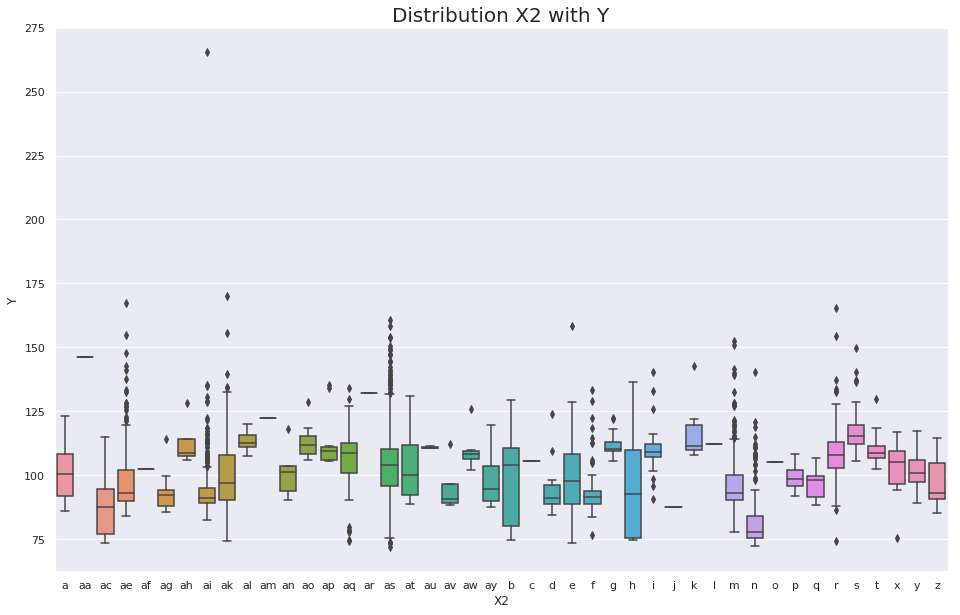

In [10]:
var_name = 'X2'
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(16,10))
sns.boxplot(x=var_name, y='y', data=df, order=col_order)
plt.ylabel("Y")
plt.xlabel("X2")
plt.title('Distribution X2 with Y', fontsize=20)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


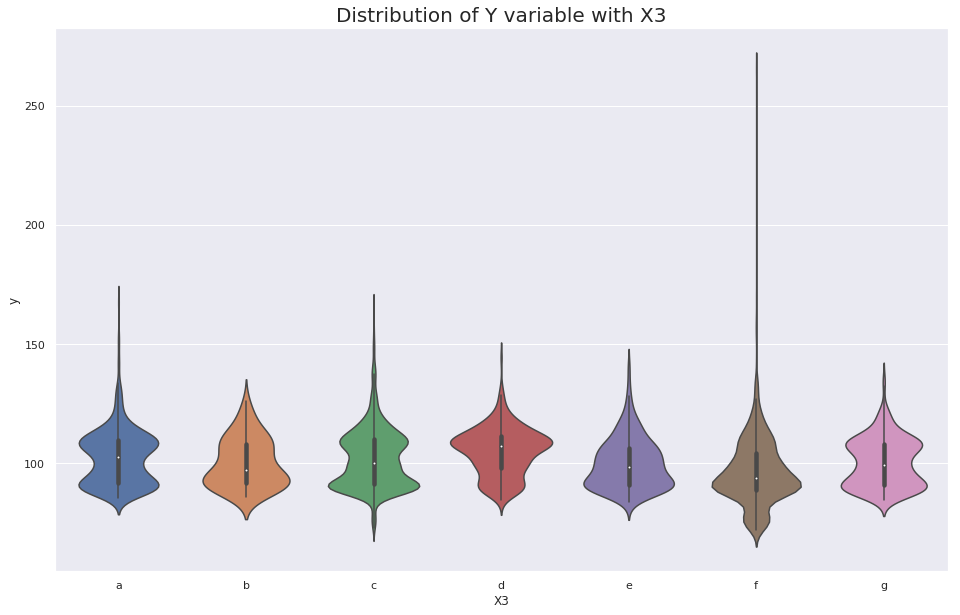

In [11]:
var_name = "X3"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(16,10))
sns.violinplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel('X3', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of Y variable with X3", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Distribution X5 with Y')

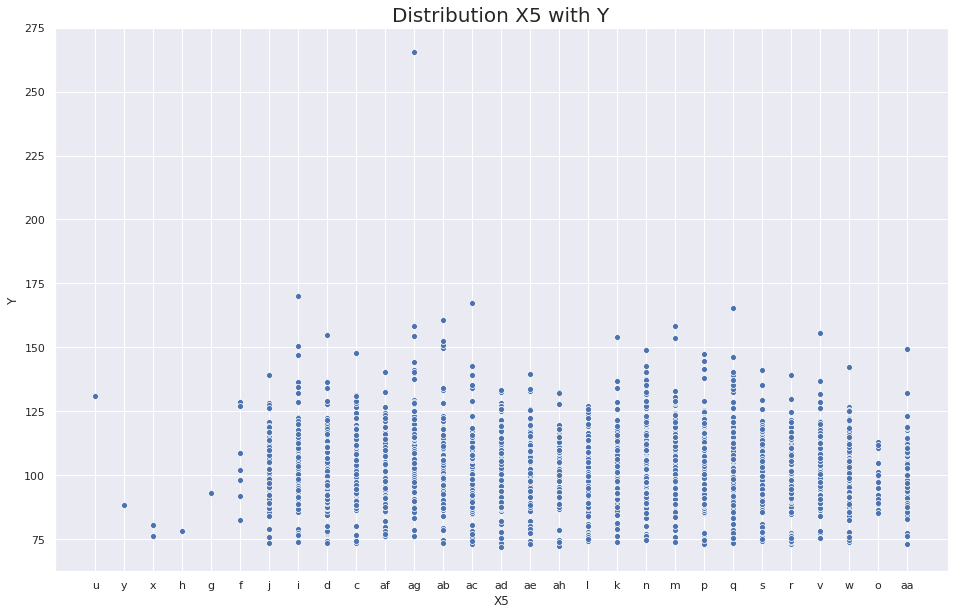

In [12]:
sns.set()
var_name = 'X5'
plt.figure(figsize=(16,10))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x= var_name, y='y', palette=cmap, sizes=(10, 200), data=df)
plt.xlabel('X5', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Distribution X5 with Y', fontsize=20)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


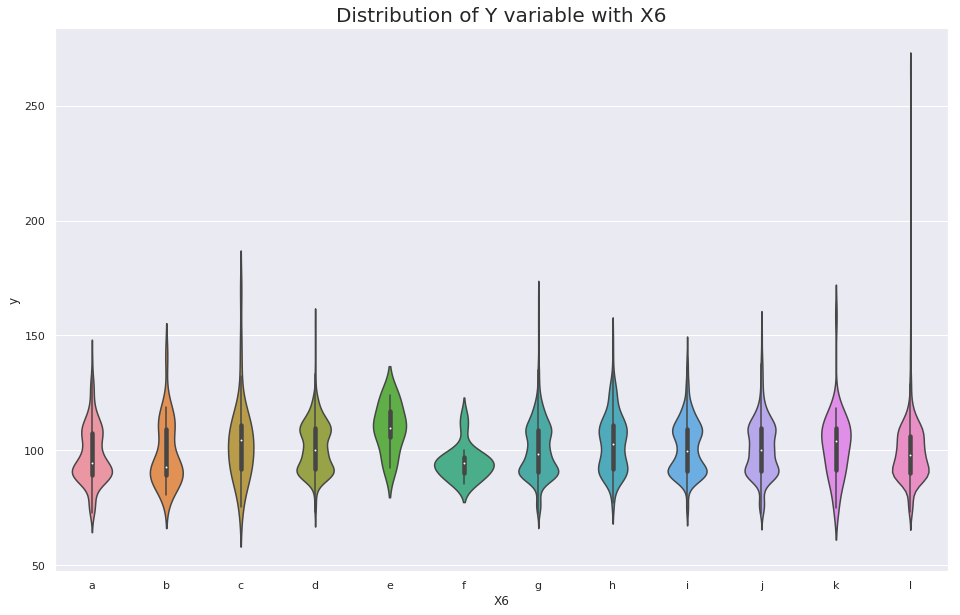

In [13]:
var_name = "X6"
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(16,10))
sns.violinplot(x=var_name, y='y', data=df, order=col_order)
plt.xlabel('X6', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of Y variable with X6", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Distribution Y with X8')

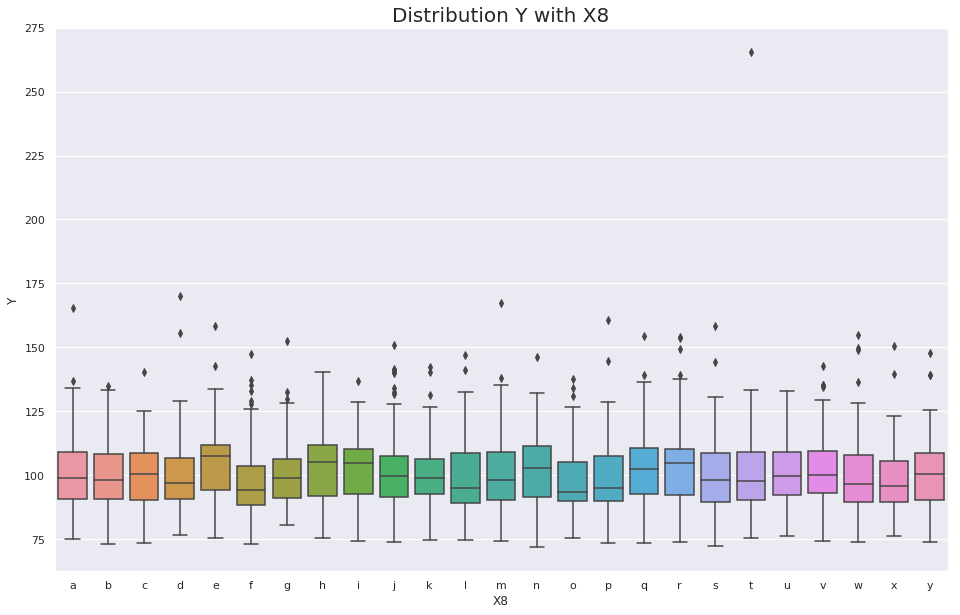

In [14]:
var_name = 'X8'
col_order = np.sort(df[var_name].unique()).tolist()
plt.figure(figsize=(16,10))
sns.boxplot(x=var_name, y='y', data=df, order=col_order)
plt.ylabel("Y")
plt.xlabel("X8")
plt.title('Distribution Y with X8', fontsize=20)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


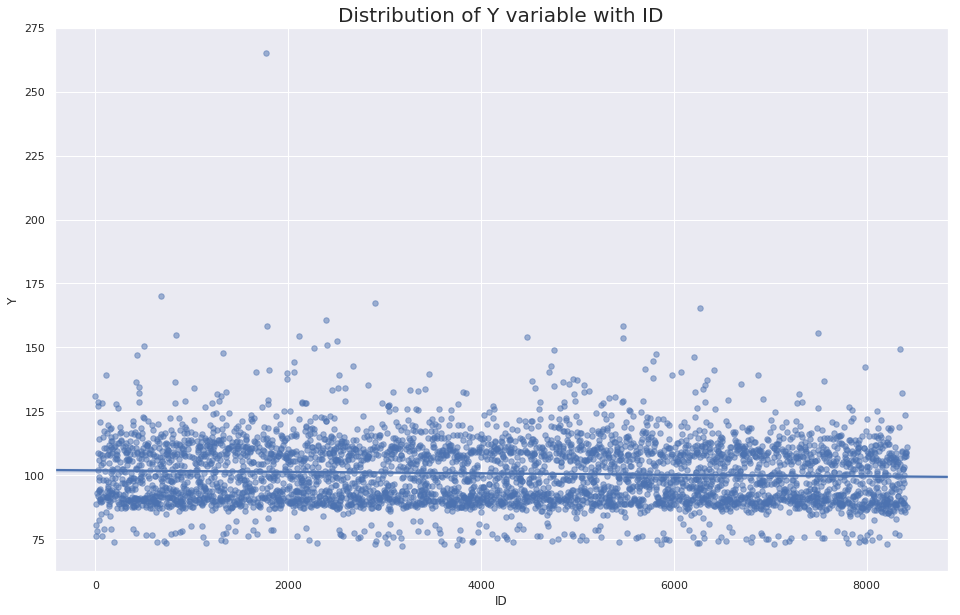

In [15]:
var_name = "ID"
plt.figure(figsize=(16,10))
sns.regplot(x=var_name, y='y', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel('ID', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title("Distribution of Y variable with ID", fontsize=20)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate

In [17]:
y_train = df['y'].values
X_train = df.select_dtypes(int).drop(columns=['ID']).values
X_test = test_df.select_dtypes(int).drop(columns=['ID']).values

In [18]:
cols_categorical = df.select_dtypes(object).columns
for col in cols_categorical:
    X = np.unique(np.concatenate((df[col].unique(), test_df[col].unique())))
    enc = LabelEncoder()
    enc.fit(X)
    X_train = np.append(X_train, enc.transform(df[col]).reshape(-1, 1), axis=1)
    X_test = np.append(X_test, enc.transform(test_df[col]).reshape(-1, 1), axis=1)

In [19]:
rf = RandomForestRegressor(n_estimators=10, random_state=42)
#rf = GradientBoostingRegressor(random_state=42)

In [20]:
%%time
rf.fit(X_train, y_train)

CPU times: user 1.18 s, sys: 0 ns, total: 1.18 s
Wall time: 1.18 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
res = cross_validate(rf, X_train, y_train, scoring='r2', cv=4, n_jobs=-1, return_train_score=False)

In [22]:
res

{'fit_time': array([3.28942466, 2.91624784, 2.86564827, 2.35527444]),
 'score_time': array([0.00753689, 0.0073204 , 0.00515914, 0.00556803]),
 'test_score': array([0.4320852 , 0.36816844, 0.47963076, 0.49245639])}

In [23]:
rf.fit(X_train, y_train)
y_test = rf.predict(X_test)

In [24]:
#print("The cross-validation MSE")
#print(rf.score(X_valid, y_valid))
#from sklearn.metrics import r2_score
#score = r2_score(X_test, y_pred)

In [25]:
y_test = pd.DataFrame({'ID': test_df['ID'].values, 'y': y_test})

In [26]:
y_test.to_csv('submissions.csv', index=False)
print(y_test)

        ID           y
0        1   77.945000
1        2   99.890000
2        3   79.138000
3        4   78.308000
4        5  109.580000
5        8   89.538333
6       10  109.862000
7       11   96.283000
8       12  114.163000
9       14   87.671000
10      15  111.677000
11      16  109.041000
12      17  107.312000
13      19   96.357000
14      20  117.296250
15      21  119.568000
16      22  117.880000
17      23  107.312000
18      26   95.948000
19      28   90.002000
20      29  107.312000
21      33  107.312000
22      35   95.443000
23      41   97.549142
24      42   91.768000
25      43  114.665000
26      45  102.938000
27      46  103.929333
28      51   92.993500
29      53   79.177000
...    ...         ...
4179  8361  111.275000
4180  8363  108.545000
4181  8364   92.611000
4182  8365   95.748000
4183  8366  101.293500
4184  8370  110.300000
4185  8372   91.157000
4186  8376   92.843000
4187  8377  107.032000
4188  8379  110.741500
4189  8380   92.134500
4190  8381 